# scqubits examples: custom circuits

For further documentation of scqubits see https://scqubits.readthedocs.io/en/latest/.

---

In [30]:
import scqubits as scq
import matplotlib.pyplot as plt
import numpy as np

# Example:   asymmetric $0$-$\pi$ circuit

**$0$-$\pi$ circuit information**

In [31]:
zp_yaml ="""
# zero-pi circuit
branches:
- ["JJ", 1, 2, EJ=10, 20] 
- ["JJ", 3, 4, EJ, 20]
- ["L", 2, 3, 0.01]
- ["L", 4, 1, 0.008]
- ["C", 1, 3, 0.02]
- ["C", 2, 4, 0.02]
"""

**Define circuit**

In [32]:
zero_pi = scq.Circuit(zp_yaml, from_file=False, ext_basis="discretized")

## Lagrangian and variable transformation

**Lagrangian in terms of node variables**

In [33]:
zero_pi.sym_lagrangian(vars_type="node")

<IPython.core.display.Latex object>

**Transformation between node variables $\{\varphi_n\}$ and new variables $\{\theta_m\}$**

In [34]:
zero_pi.variable_transformation()

<IPython.core.display.Latex object>

In [35]:
zero_pi.transformation_matrix

array([[ 1., -1.,  1.,  1.],
       [ 0., -1.,  0.,  1.],
       [ 0.,  1.,  1.,  1.],
       [ 1.,  1.,  0.,  1.]])

**Types of $\{\theta_m\}$ variables in the $0$-$\pi$ circuit.** 

In [36]:
zero_pi.var_categories
# The numbers associated to each type correspond to the indices of the $\theta_m$ variables.

{'periodic': [1], 'extended': [2, 3], 'free': [], 'frozen': [], 'sigma': [4]}

**Symbolic Lagrangian in terms of new variables**

In [37]:
zero_pi.sym_lagrangian(vars_type="new")

<IPython.core.display.Latex object>

## Hamiltonian and diagonalization

**Symbolic Hamiltonian**

In [38]:
zero_pi.sym_hamiltonian()

<IPython.core.display.Latex object>

In [39]:
zero_pi.offset_charges

[ng1]

In [40]:
zero_pi.ng1

0.0

In [41]:
zero_pi.offset_charge_transformation()

<IPython.core.display.Latex object>

**Set cut-off for each variable**

In [42]:
zero_pi.cutoff_names

['cutoff_n_1', 'cutoff_ext_2', 'cutoff_ext_3']

In [43]:
zero_pi.cutoff_n_1 = 15
zero_pi.cutoff_ext_2 = 15
zero_pi.cutoff_ext_3 = 15

**Eigenvalues**

In [44]:
%time zero_pi.eigenvals()

CPU times: total: 1.12 s
Wall time: 166 ms


array([-7.81287861, -7.55203947, -7.55159317, -6.76876942, -6.76876917,
       -6.74373122])

## Spectrum using hierarchical diagonalization algorithm (HD) to reduce computational time

**Associate the $\theta_m$ variables to subsystems**

In [45]:
system_hierarchy = [[1,3], [2]]
scq.truncation_template(system_hierarchy)

[6, 6]

**Set cut-offs for the eigenbasis of each subsystem**

In [46]:
subsystem_trunc_dims = [80, 30]

**Setup circuit for HD**

In [47]:
zero_pi.cutoff_n_1 = 15
zero_pi.cutoff_ext_2 = 40
zero_pi.cutoff_ext_3 = 80
zero_pi.configure(system_hierarchy=system_hierarchy, subsystem_trunc_dims=subsystem_trunc_dims)

**Hamiltonian of each subsystem**

In [48]:
zero_pi.sym_hamiltonian(subsystem_index=0) 

<IPython.core.display.Latex object>

In [49]:
zero_pi.sym_hamiltonian(subsystem_index=1)

<IPython.core.display.Latex object>

**Interaction between subsystems**

In [50]:
zero_pi.sym_interaction((0,1))  # show coupling terms between subsystems 0 and 1

<IPython.core.display.Latex object>

**Eigenvalues using HD**

In [51]:
%time zero_pi.eigenvals()

CPU times: total: 1.28 s
Wall time: 181 ms


array([-3.6468765 , -3.6460129 , -3.60915292, -3.60828503, -3.57142931,
       -3.57055715])

## Set external fluxes

In [52]:
zero_pi.sym_external_fluxes()

{Φ1: (Branch(JJ, 3, 4, index: 1),
  [Branch(JJ, 1, 2, index: 0),
   Branch(L, 4, 1, index: 3),
   Branch(JJ, 3, 4, index: 1),
   Branch(L, 2, 3, index: 2)])}

In [53]:
zero_pi.get_initdata()

{}

Spectral data:   0%|          | 0/21 [00:00<?, ?it/s]

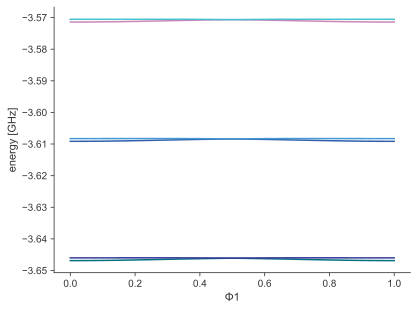

In [54]:
zero_pi.plot_evals_vs_paramvals("Φ1", np.linspace(0,1,21));
# zero_pi.plot_evals_vs_paramvals("ng1", np.linspace(0,1,51))

## Visualization capabilities

**Potential energy cross-sections**

In [55]:
zero_pi.potential_symbolic

0.009*θ3**2 + 0.036*θ2**2 - EJ*cos(1.0*θ1 + 1.0*θ3) - EJ*cos(1.0*Φ1 + 1.0*θ1 - 1.0*θ3) + 0.004*θ2*θ3

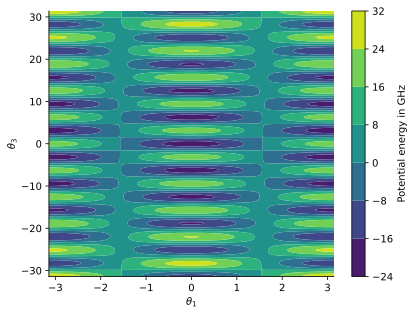

In [56]:
zero_pi.plot_potential(θ1=np.linspace(-np.pi, np.pi,100), 
                       θ3=np.linspace(-10*np.pi, 10*np.pi, 300), 
                       θ2 = 0.);

### Eigenstates

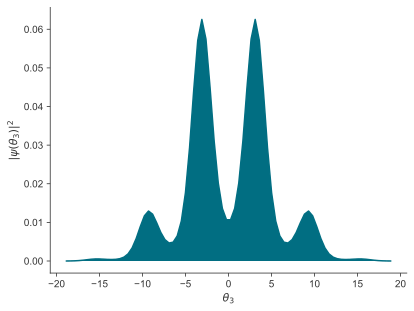

In [57]:
zero_pi.plot_wavefunction(which=0, var_indices=(3,));

A maximum of two variable indices can be specified for a plot:

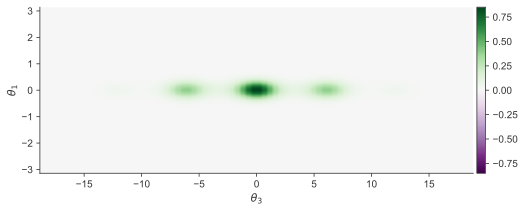

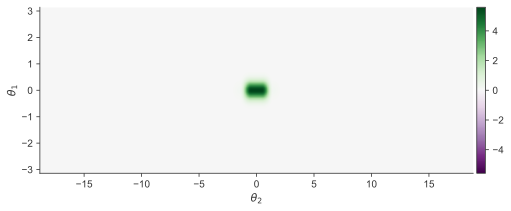

In [58]:
zero_pi.plot_wavefunction(which=1, var_indices=(1,3))
zero_pi.plot_wavefunction(which=1, var_indices=(1,2));